<a href="https://colab.research.google.com/github/MrCalmTam/FUZZYLOGIC/blob/main/AImobilerobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e8ea3b09d36ba995527e46cb0dfac3e917b39f4ae8f2042228f5414590fc1e2a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

In [ ]:
s1 = ctrl.Antecedent(np.arange(0,151,1),'s1')
s2 = ctrl.Antecedent(np.arange(0,151,1),'s2')
s3 = ctrl.Antecedent(np.arange(0,151,1),'s3')

s1s2 = ctrl.Consequent(np.arange(-90,1,1),'s1s2') #retrai
s2s3 = ctrl.Consequent(np.arange(0,91,1),'s2s3')  #reophai
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')


s1.automf(3)
s2.automf(3)
s3.automf(3)
s1s2.automf(3)
s2s3.automf(3)
pwm.automf(3)

#s1.view()
#s2.view()
#s3.view()
#s1s2.view()
#s2s3.view()




In [ ]:
rule1 = ctrl.Rule(s1['poor'] & s2['poor'], s1s2['poor'])
rule2 = ctrl.Rule(s1['poor'] & s2['average'], s1s2['poor'])
rule3 = ctrl.Rule(s1['poor'] & s2['good'], s1s2['good'])
rule4 = ctrl.Rule(s1['average'] & s2['poor'], s1s2['average'])
rule5 = ctrl.Rule(s1['average'] & s2['average'], s1s2['average'])
rule6 = ctrl.Rule(s1['average'] & s2['good'], s1s2['good'])
rule7 = ctrl.Rule(s1['good'] & s2['poor'], s1s2['good'])
rule8 = ctrl.Rule(s1['good'] & s2['average'], s1s2['good'])
rule9 = ctrl.Rule(s1['good'] & s2['good'],s1s2['good'])

rule10 = ctrl.Rule(s1['poor'] & s2['poor'], s2s3['good'])
rule11 = ctrl.Rule(s1['poor'] & s2['average'], s2s3['good'])
rule12 = ctrl.Rule(s1['poor'] & s2['good'], s2s3['poor'])
rule13 = ctrl.Rule(s1['average'] & s2['poor'], s2s3['average'])
rule14 = ctrl.Rule(s1['average'] & s2['average'], s2s3['average'])
rule15 = ctrl.Rule(s1['average'] & s2['good'], s2s3['poor'])
rule16 = ctrl.Rule(s1['good'] & s2['poor'],s2s3['poor'])
rule17 = ctrl.Rule(s1['good'] & s2['average'], s2s3['poor'])
rule18 = ctrl.Rule(s1['good'] & s2['good'], s2s3['poor'])

rule19 = ctrl.Rule(s1s2['poor'] & s2s3['poor'], pwm['good'])
rule20 = ctrl.Rule(s1s2['poor'] & s2s3['average'], pwm['good'])
rule21 = ctrl.Rule(s1s2['poor'] & s2s3['good'], pwm['average'])
rule22 = ctrl.Rule(s1s2['average'] & s2s3['poor'], pwm['average'])
rule23 = ctrl.Rule(s1s2['average'] & s2s3['average'], pwm['average'])
rule24 = ctrl.Rule(s1s2['average'] & s2s3['good'], pwm['poor'])
rule25 = ctrl.Rule(s1s2['good'] & s2s3['poor'], pwm['average'])
rule26 = ctrl.Rule(s1s2['good'] & s2s3['average'], pwm['poor'])
rule27 = ctrl.Rule(s1s2['good'] & s2s3['good'], pwm['poor'])



120.83269557476973


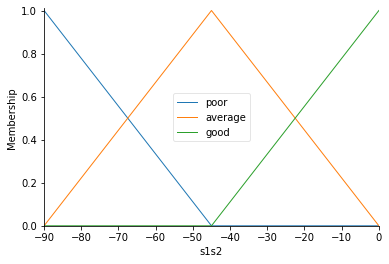

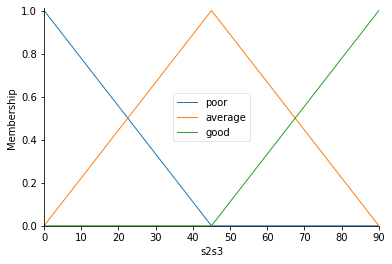

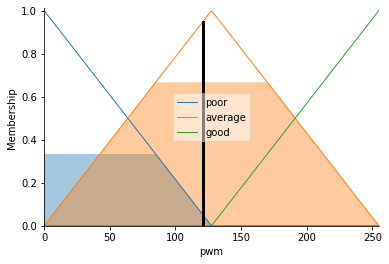

In [ ]:
pwmcontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,
                                      rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
pwmcontrol =ctrl.ControlSystemSimulation(pwmcontrol_ctrl)
pwmcontrol.input['s1']=  100
pwmcontrol.input['s2']= 50

pwmcontrol.compute()
print(pwmcontrol.output['pwm'])
s1s2.view()
s2s3.view()
pwm.view(sim=pwmcontrol)